
Math_score Score Lower Outliers Count: 2
Math_score Score Lower Outliers: 0.0, 22.0

Math_score Score Upper Outliers Count: 2
Math_score Score Upper Outliers: 157.0, 167.0



Reading_score Score Lower Outliers Count: 0
Reading_score Score Lower Outliers: 

Reading_score Score Upper Outliers Count: 2
Reading_score Score Upper Outliers: 175.0, 187.0



Writing_score Score Lower Outliers Count: 2
Writing_score Score Lower Outliers: 10.0, 22.0

Writing_score Score Upper Outliers Count: 2
Writing_score Score Upper Outliers: 160.0, 170.0




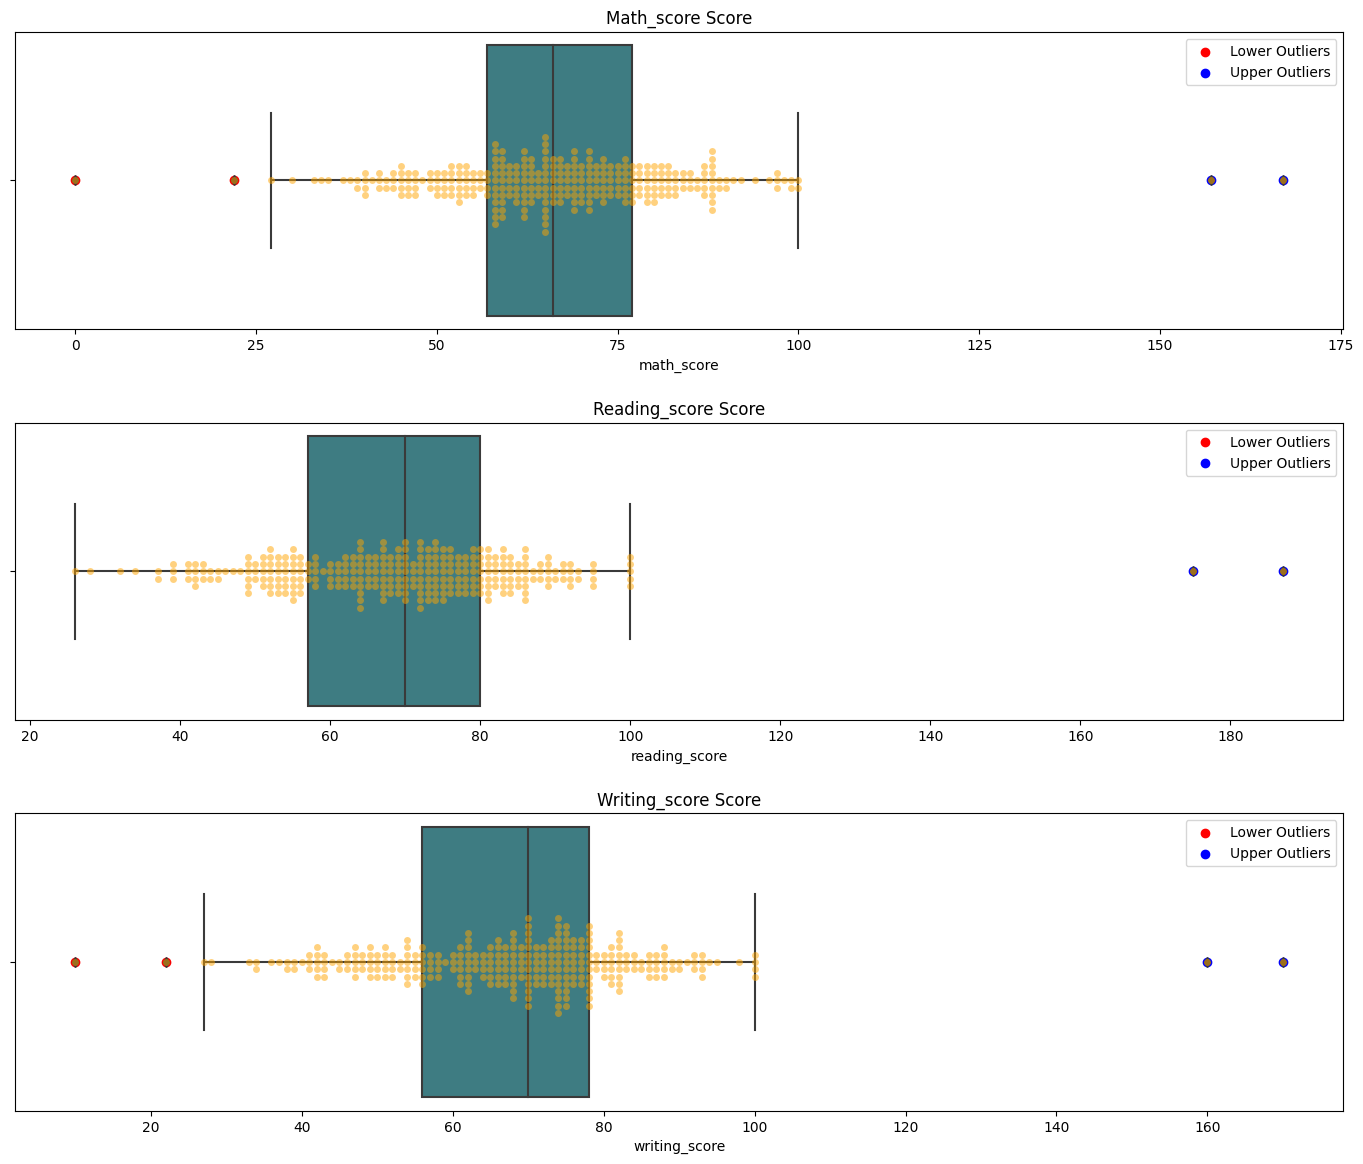

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ot = pd.read_csv(r'C:\Users\pv437\Desktop\Data Scince Folder\Linked in\study_Data.csv')

columns = ['math_score', 'reading_score', 'writing_score']
fig, axes = plt.subplots(len(columns), 1, figsize=(14, 12), sharex=False, sharey=False)

for i, column in enumerate(columns):
    sns.boxplot(x=column, data=ot, palette='crest', ax=axes[i])
    sns.swarmplot(x=column, data=ot, color='orange', alpha=0.5, ax=axes[i])

    lower_outliers = ot[ot[column] < ot[column].quantile(0.25) - 1.5 * (ot[column].quantile(0.75) - ot[column].quantile(0.25))][column]
    upper_outliers = ot[ot[column] > ot[column].quantile(0.75) + 1.5 * (ot[column].quantile(0.75) - ot[column].quantile(0.25))][column]

    axes[i].scatter(lower_outliers, [0] * len(lower_outliers), color='red', label='Lower Outliers')
    axes[i].scatter(upper_outliers, [0] * len(upper_outliers), color='blue', label='Upper Outliers')
    axes[i].legend()
    axes[i].set_title(f'{column.capitalize()} Score')

    print(f"\n{column.capitalize()} Score Lower Outliers Count: {len(lower_outliers)}\n"
          f"{column.capitalize()} Score Lower Outliers: {', '.join(map(str, lower_outliers.values.tolist()))}\n\n"
          f"{column.capitalize()} Score Upper Outliers Count: {len(upper_outliers)}\n"
          f"{column.capitalize()} Score Upper Outliers: {', '.join(map(str, upper_outliers.values.tolist()))}\n\n")

plt.tight_layout(pad=2.0)
plt.show()
